
# Titanic Survival Prediction
## Machine Learning Project


In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import lightgbm as lgb
import xgboost as xgb


## Create Project Folders

In [2]:

folders = ["data", "models", "output", "output/graphs", "output/reports"]
for f in folders:
    os.makedirs(f, exist_ok=True)


## Load Dataset

In [3]:

train_df = pd.read_csv("data/Titanic_train.csv")
test_df = pd.read_csv("data/Titanic_test.csv")

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

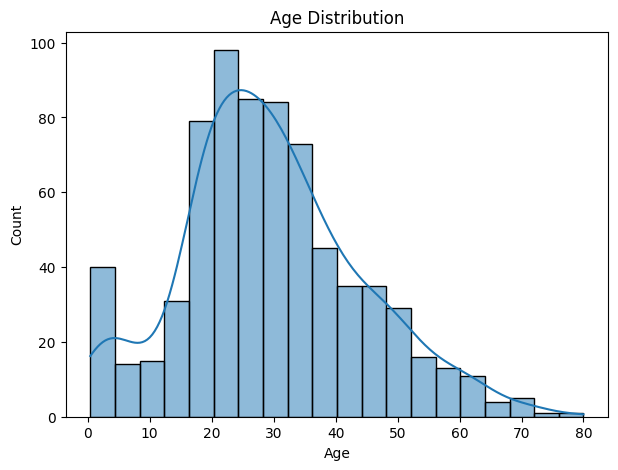

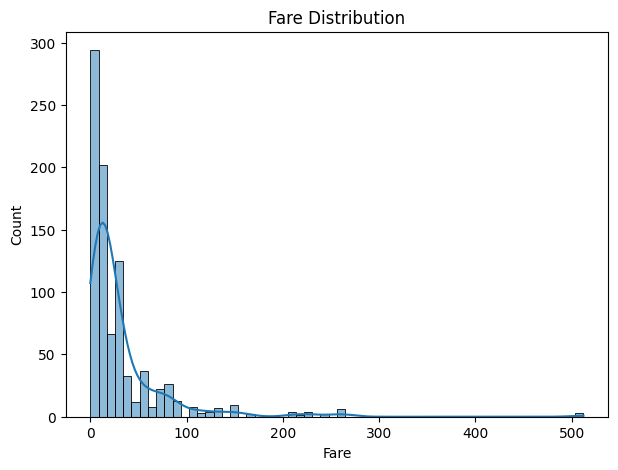

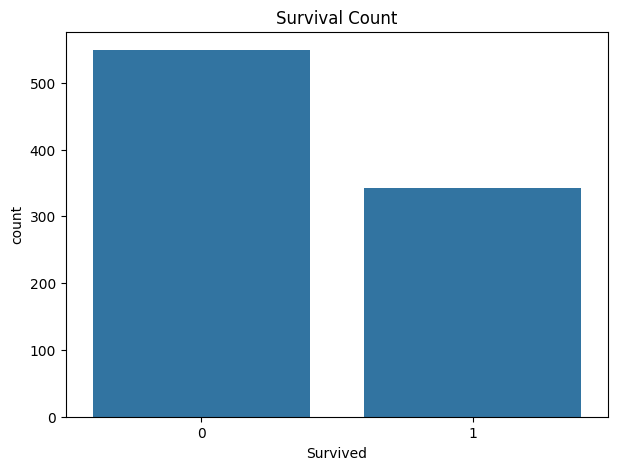

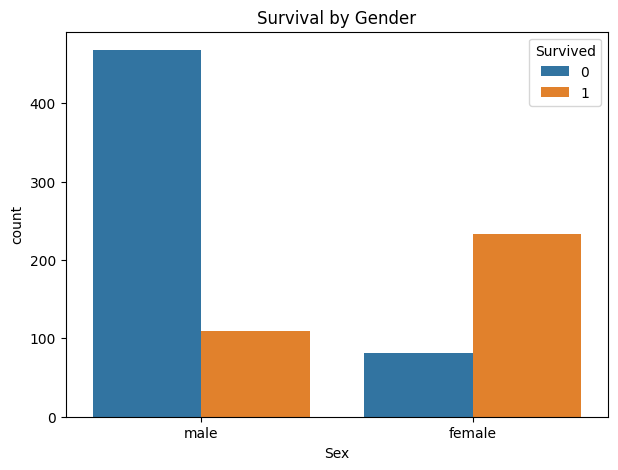

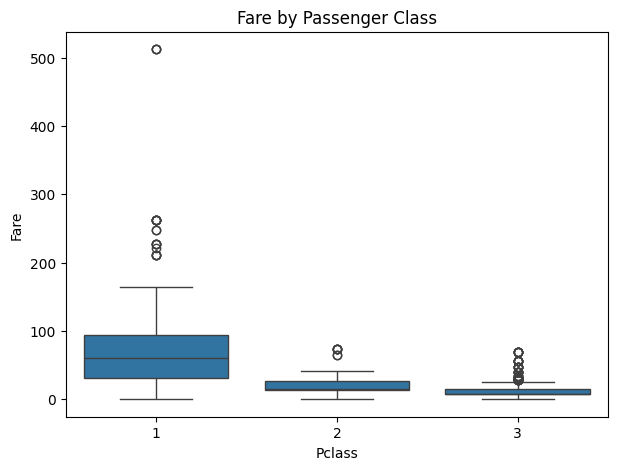

In [4]:

def save_plot(fig, filename):
    os.makedirs("output/graphs", exist_ok=True)
    fig.savefig(f"output/graphs/{filename}")
    plt.show()
    plt.close(fig)

# Age Distribution
fig = plt.figure(figsize=(7,5))
sns.histplot(train_df["Age"].dropna(), kde=True)
plt.title("Age Distribution")
save_plot(fig, "age_distribution.png")

# Fare Distribution
fig = plt.figure(figsize=(7,5))
sns.histplot(train_df["Fare"], kde=True)
plt.title("Fare Distribution")
save_plot(fig, "fare_distribution.png")

# Survival Count
fig = plt.figure(figsize=(7,5))
sns.countplot(x="Survived", data=train_df)
plt.title("Survival Count")
save_plot(fig, "survival_count.png")

# Survival by Gender
fig = plt.figure(figsize=(7,5))
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Survival by Gender")
save_plot(fig, "survival_by_gender.png")

# Fare by Passenger Class
fig = plt.figure(figsize=(7,5))
sns.boxplot(x="Pclass", y="Fare", data=train_df)
plt.title("Fare by Passenger Class")
save_plot(fig, "fare_by_class.png")


## Data Preprocessing

In [5]:

def handle_missing(df):
    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Fare"].fillna(df["Fare"].median(), inplace=True)
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
    if "Cabin" in df.columns:
        df.drop("Cabin", axis=1, inplace=True)
    return df

def encode(df):
    le = LabelEncoder()
    df["Sex"] = le.fit_transform(df["Sex"])
    df["Embarked"] = le.fit_transform(df["Embarked"])
    return df

train_df = encode(handle_missing(train_df))
test_df = encode(handle_missing(test_df))

features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
X = train_df[features]
y = train_df["Survived"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


C:\Users\pndin\AppData\Local\Temp\ipykernel_25552\474466188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\pndin\AppData\Local\Temp\ipykernel_25552\474466188.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

## Model Training

In [6]:

lgb_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.05, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_val)
joblib.dump(lgb_model, "models/lgbm_model.pkl")

xgb_model = xgb.XGBClassifier(
    n_estimators=500, learning_rate=0.05, max_depth=5,
    subsample=0.8, colsample_bytree=0.8,
    random_state=42, objective="binary:logistic"
)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)
joblib.dump(xgb_model, "models/xgb_model.pkl")


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


['models/xgb_model.pkl']

## Model Evaluation

In [7]:

def metrics(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true,y_pred),
        "precision": precision_score(y_true,y_pred),
        "recall": recall_score(y_true,y_pred),
        "f1_score": f1_score(y_true,y_pred)
    }

lgb_m = metrics(y_val, lgb_preds)
xgb_m = metrics(y_val, xgb_preds)

os.makedirs("output/reports", exist_ok=True)

with open("output/reports/lightgbm_evaluation.txt","w") as f:
    for k,v in lgb_m.items():
        f.write(f"{k}: {v:.4f}\n")

with open("output/reports/xgboost_evaluation.txt","w") as f:
    for k,v in xgb_m.items():
        f.write(f"{k}: {v:.4f}\n")

with open("output/reports/comparison_report.txt","w") as f:
    f.write("LIGHTGBM vs XGBOOST REPORT\n")
    f.write("="*40+"\n")
    f.write("[LightGBM]\n")
    for k,v in lgb_m.items():
        f.write(f"{k}: {v:.4f}\n")
    f.write("\n[XGBoost]\n")
    for k,v in xgb_m.items():
        f.write(f"{k}: {v:.4f}\n")
